# Read, manipulate, and write data

   The **arcgisbinding** package provides functionality that simplifies bringing ArcGIS data types into R and manipulating them so they are ready for analysis. On the simplest level, the bridge allows for the easy transfer of data back and forth between ArcGIS and R without having to manually convert data sets into a recognizable format. However, the functionality enables much more, everything from advanced data aggregations, subsets, and selections, to data manipulations regarding format or projections. All of this contained within a couple of functions to make the process simple. Through the power of the R-ArcGIS Bridge, you can easily transfer data from ArcGIS to R to gain access to the wealth of statistical packages and functions that you might need to further your analysis. Once finished, the bridge allows you to transfer your data back to ArcGIS to take advantage of the mapping, publishing, and sharing aspects of ArcGIS. 

See below for the various topics pertaining to **arcgisbinding** package functionality. Each topic has a section containing details on how the functionality works along with practice examples. 

 - Read: [Reading ArcGIS Data Into R](#Read:-Reading-ArcGIS-Data-Into-R)
  - [arc.open Functionality](#arc.open-Functionality)    
 - Manipulate: [Manipulating ArcGIS Data In R](#Manipulate:-Manipulating-ArcGIS-Data-In-R)
  - [Vector Data](#Vector-Data)
    - [arc.select Functionality](#arc.select-Functionality)
       - [Column Selections](#Column-Selections)
       - [Data Subsets with SQL Queries](#Data-Subsets-with-SQL-Queries)
       - [Reprojecting](#Reprojecting)
    - [arc.data2sp Functionality](#arc.data2sp-Functionality)
    - [arc.data2sf Functionality](#arc.data2sf-Functionality)
  - [Raster Data](#Raster-Data)
    - [arc.raster Functionality](#arc.raster-Functionality)
       - [Pixel Selections](#Pixel-Selections)
       - [Pixel Type Adjustments](#Pixel-Type-Adjustments)
       - [Resampling](#Resampling)
       - [Reprojecting](#Reprojecting)
    - [as.raster Functionality](#as.raster-Functionality)
    - [Mosaic Datasets](#Mosaic-Datasets)
 - Write: [Writing R Data Into ArcGIS](#Write:-Writing-R-Data-Into-ArcGIS)
    - [arc.write Functionality](#arc.write-Functionality)    
 - Delete: [Remove and Replace Data](#Delete:-Remove-and-Replace-Data)
    - [arc.delete Functionality](#arc.delete-Functionality)    
 - [Exercise: Analyze Crime Using Statistics and the R-ArcGIS Bridge](#Exercise:-Analyze-Crime-Using-Statistics-and-the-R-ArcGIS-Bridge)

 ## Read: Reading ArcGIS Data Into R
 
 The first main use of the bridge is to transfer data from ArcGIS to R. When you are first getting started with the bridge, the functions that you will use most often include:

 * `arc.check_product()`
 
 * `arc.open()`
 
Once you have initialized the bridge connection in ArcGIS by installing the **arcgisbinding** package into your R workspace, see the R-bridge-install-and-setup Jupyter Notebook for full details, you will finalize the connection between ArcGIS and R by using the `arc.check_product()` function in R. This function does not take any arguments and will return details regarding your current ArcGIS installation and your current version of the **arcgisbinding** package. 

```R
arc.check_product()
```

When starting a new R session or script, you will always begin with the following:

In [2]:
library(arcgisbinding)
arc.check_product()

Warning message:
"package 'arcgisbinding' was built under R version 3.5.0"*** Please call arc.check_product() to define a desktop license.


product: ArcGIS Pro ( 12.2.0.12813 )
license: Advanced 
version: 1.0.1.230

After you have successfully connected ArcGIS and R, you can begin loading your data into your desired workspace. For GIS data that is currently stored in a shapefile, file geodatabase, table, feature service, or ArcGIS supported raster data type, you will begin by using the `arc.open()` function to read it into R. 
 
 ### arc.open Functionality
 
 These Jupyter Notebooks come with sample data which, we will use for the purpose of demonstrating the functions contained in the **arcgisbinding** package in the following tutorials. Most of this data has been stored in a file geodatabase called 'data.gdb' which is contained in a folder called 'data' along with some shapefiles. This same data has been made available for you as well, so if desired, you can follow along or practice in R or RStudio.
 
 To access this data in these notebooks, we can start by checking where our current working directory is located by using the `getwd()` core R function. This function returns the path of our working directory and comes with the core packages included with R by default. 
 

In [2]:
getwd()

[1] "C:/ArcGIS/Pro/bin/Python/envs/arcgispro-r"

Our working environment is set to the file path pertaining to a conda environment created for this Jupyter Notebook. This environment contains R and all the packages we will use throughout most of our exercises. The 'data' folder is located at this location as well. So to access data from it, we simply need to provide that folder information in our R function calls. We can check this out by inspecting the items contained in this location. 

In [3]:
list.files(path = "data")

[1] "crashes_per_mile.CPG"     "crashes_per_mile.dbf"    
 [3] "crashes_per_mile.prj"     "crashes_per_mile.sbn"    
 [5] "crashes_per_mile.sbx"     "crashes_per_mile.shp"    
 [7] "crashes_per_mile.shp.xml" "crashes_per_mile.shx"    
 [9] "data.gdb"                 "new_pts.cpg"             
[11] "new_pts.dbf"              "new_pts.shp"             
[13] "new_pts.shx"              "ScanStatistic.R"         
[15] "ScanStatistic_Solution.R"

Now that we have a better idea of where the data for these notebooks is located, we can begin taking advantage of bridge functionality. To use the `arc.open()` function, the only argument needed is the path location at which the data you are trying to load is stored. In this case, that absolute path is `'C:/ArcGIS/Pro/bin/Python/envs/arcgispro-r/data'` for any ArcGIS shapefiles or `'C:/ArcGIS/Pro/bin/Python/envs/arcgispro-r/data/data.gdb'` for the datasets stored within this file geodatabase which include:
* African_Buffalo_Locations
* Billboard_Faces
* San_Francisco_Crimes
* World_Bioclimates_Study_Area_SM
* World_Distance_to_Water_Stud_SM
* World_Ecological_Facets_Stud_SM
* World_Land_Cover_Study_Area_SM
* World_Lithology_Study_Area_0_SM

If we were to start by opening the crashes_per_mile.shp in our data folder, we would begin by calling the `arc.open()` function with the relative path location of this shapefile as its argument. We do not need the absolute path in this case since our working directory is already set to `'C:/ArcGIS/Pro/bin/Python/envs/arcgispro-r/'`. 

```R
crashes_arc <- arc.open("data/crashes_per_mile.shp")
```

The sample data is now stored in the `crashes_arc` variable which is an `arc.dataset` object of class S4. This enables you to gain easy access to your data's metadata, such as its extent, a list of field names, and its geometry information.

```R
crashes_arc.dataset@extent
crashes_arc.dataset@fields
crashes_arc.dataset@shapeinfo
``` 

We see this for ourselves in this Jupyter Notebook by inserting an R code box below and executing the lines from above. 

In [4]:
crashes_arc <- arc.open("data/crashes_per_mile.shp")
crashes_arc@extent
crashes_arc@fields
crashes_arc@shapeinfo

xmin      ymin      xmax      ymax 
 230656.1 4094991.4  673579.2 4651709.2

$FID
[1] "OID"

$Shape
[1] "Geometry"

$OBJECTID
[1] "Integer"

$RouteNm
[1] "String"

$LABEL
[1] "String"

$BEG_MP
[1] "Double"

$END_MP
[1] "Double"

$DESCRIP
[1] "String"

$REGION
[1] "Integer"

$AVG_AADT
[1] "Double"

$FC_NAME
[1] "String"

$TOT_C
[1] "Integer"

$C_MI
[1] "Double"

$C_SCORE
[1] "Integer"

$PROTECTED
[1] "String"

$State_FA
[1] "String"

geometry type   : Polyline
WKT             : PROJCS["NAD_1983_UTM_Zone_12N",GEOGCS["GCS_North_American_19...
WKID            : 26912

If you wish to learn more, check out our documentation by running the following line in the R code box below:

In [27]:
?arc.open()

## Manipulate: Manipulating ArcGIS Data In R

In its simplest use case, the **arcgisbinding** package can be used to establish a connection to an ArcGIS data type and then to convert that data type into a recognized R object, specifically either a data frame or a spatial data frame. However, other R packages offer similar functionality and as a result, the **arcgisbinding** package distinguishes itself by offering advanced data manipulations within its conversion functions to enable not only the easy transfer of data, but also the ability to transform your data into its desired state needed for a specific R analysis function. A variety of different options are available for vector data and for raster data. To begin, we will examine all of the bridge functionality pertaining to a vector data set. 

### Vector Data

While the `arc.open()` function works with all ArcGIS data types, whether vector or raster, to establish a connection to your desired ArcGIS data, the **arcgisbinding** package has two seperate functions for converting and manipulating data depending on the type of data you wish to bring into R. The `arc.select()` function is what is used for a vector dataset contained within any type of ArcGIS supported format be it a shapefile, file geodatabase, hosted feature layer, or table.

#### arc.select Functionality

The `arc.select` function is used to convert your data set into an R data frame object. This function also offers you the ability to choose specific attributes from your data set to work with, the ability to construct SQL queries to only bring in certain observations based on the criteria of your analysis, and can be used to reproject your data. Each one of these actions can be accomplished by taking advantage of the arguments of the `arc.select()` function. To help explore this functionality, we will cover each one in turn. 

To begin, let's start with the simplest use case. We simply wish to convert an ArcGIS vector data set into an R recognized object. In this case, after using the `arc.open()` function to establish a connection with our desired data set, we can use the `arc.select` function on the result generated from `arc.open()` to convert our data into an R data frame object. Let's take our `crashes_per_mile` shapefile as an example:

```R
crashes_arc <- arc.open("data/crashes_per_mile.shp")
crashes_df <- arc.select(crashes_arc)
```
Our `crashes_per_mile` ArcGIS shapefile is now in R as a data frame and any R function that takes a data frame as part of its arguments can now be used on it. For example, we can take a peek at the first 6 rows of this data frame in R by using the `head()` function. 

In [5]:
crashes_df <- arc.select(crashes_arc)
head(crashes_df)

FID,OBJECTID,RouteNm,LABEL,BEG_MP,END_MP,DESCRIP,REGION,AVG_AADT,FC_NAME,TOT_C,C_MI,C_SCORE,PROTECTED,State_FA
0,1,I-15,0015N,88.353,94.453,SR 271 Paragonah,4,16786.667,Rural Interstate,35,1.915709,2,23 USC 409,State
1,2,I-215,0215P,7.697,9.216,SR 152 2000 East (Highland Drive),2,86801.667,Urban Interstate,101,22.295806,4,23 USC 409,State
2,3,SR-151,0151P,0.000,1.004,Bangerter Highway via 10400 South,2,19135.000,Urban Principal Arterial,63,21.000000,4,23 USC 409,State
3,4,SR-115,0115P,7.072,8.247,Rt turns on 6800 South - SR 156,3,2836.667,Urban Collector,17,4.843305,3,23 USC 409,State
4,5,SR-13,0013P,1.343,2.872,SR 90 (200 S) via SR 13 (Main St) - Forest St Brigham City,1,13583.588,Urban Principal Arterial,84,18.421053,4,23 USC 409,State
5,6,I-80,0080N,111.190,113.276,SR 202 Saltair Drive (Garfield Cutoff),2,22017.678,Urban Interstate,68,10.897436,3,23 USC 409,State


The first argument of the `arc.select()` function is the resulting object from the `arc.open()` function. To simplify the above example, we could type the following instead:

```R
crashes_df <- arc.select(arc.open("data/crashes_per_mile.shp"))
```

This is a more efficient call since we are not wasting memory on the object from `arc.open()` which we will not use outside of being an argument to `arc.select()`. 

However, in the above example, we are not diving into what makes the **arcgisbinding** package so powerful. For starters, we are using a shapefile and we are also not opting to make any manipulations. Let's take a look at some of the more advanced functionality of `arc.select()` in detail:

##### Column Selections

The second argument to the `arc.open()` function is a parameter called `fields`. This parameter allows us to specify the specific columns from our ArcGIS data set that we wish to bring in, if we do not need all of them for our R work. To use the `fields` parameter, you will construct a vector of strings pertaining to the specific column names you wish to bring in. These column names must match those in your ArcGIS data set exactly in terms of spelling and capitalization. As an example, above, we saw the first six rows of the `crashes_per_mile` shapefile along with the column names. Say we were only interested in the columns pertaining to object id, route number, beginning milepost, ending milepost, and region. To bring in only these columns, we would construct the following `arc.select()` function call:

```R
crashes_subset_df <- arc.select(arc.open("data/crashes_per_mile.shp"), c("OBJECTID", "RouteNm", "BEG_MP", "END_MP", "REGION"))
```
We can see how this works in R below:

In [28]:
crashes_subset_df <- arc.select(arc.open("data/crashes_per_mile.shp"), c("OBJECTID", "RouteNm", "BEG_MP", "END_MP", "REGION"))
head(crashes_subset_df)

OBJECTID,RouteNm,BEG_MP,END_MP,REGION
1,I-15,88.353,94.453,4
2,I-215,7.697,9.216,2
3,SR-151,0.000,1.004,2
4,SR-115,7.072,8.247,3
5,SR-13,1.343,2.872,1
6,I-80,111.190,113.276,2


##### Data Subsets With SQL Queries

The third argument of the `arc.select()` function allows us to specify an SQL query if we wish to make a subset of our data based on a certain attribute value. This parameter is called the `where_clause` and it can be used by putting the column name that contains the attribute you wish to subset off of along with the expression desired and the attribute value, all in quotes. For example, if we wish to examine the subset of crashes that occurred on Route 1-80, we could craft the following `arc.select()` function call:

```R
crashes_subset_df <- arc.select(arc.open("data/crashes_per_mile.shp"), c("OBJECTID", "RouteNm", "BEG_MP", "END_MP", "REGION"), "RouteNm = 'I-80'")
```
Or, if we wished to examine the subset of crashes that occurred between regions 2 and 4 (inclusively), we could do so with the following call:

```R
crashes_subset_df <- arc.select(arc.open("data/crashes_per_mile.shp"), c("OBJECTID", "RouteNm", "BEG_MP", "END_MP", "REGION"), "REGION >= 2 AND REGION <= 4")
```

Let's try this out in R:

In [5]:
crashes_subset2_df <- arc.select(arc.open("data/crashes_per_mile.shp"), c("OBJECTID", "RouteNm", "BEG_MP", "END_MP", "REGION"), "REGION >= 2 AND REGION <= 4")
head(crashes_subset2_df)

OBJECTID,RouteNm,BEG_MP,END_MP,REGION
1,I-15,88.353,94.453,4
2,I-215,7.697,9.216,2
3,SR-151,0.000,1.004,2
4,SR-115,7.072,8.247,3
6,I-80,111.190,113.276,2
7,I-15,297.920,298.916,2


##### Reprojecting

The fourth argument of the `arc.select` function allows us to reproject our data by using the `sr` parameter and specifying either the ESPG reference number or the WKT or proj4 associcated with the ESPG reference number for the desired projection. Our `crashes_per_mile` shapefile is currently projected in the [UTM Zone 12N](http://spatialreference.org/ref/epsg/nad83-utm-zone-12n/). However, for the sake of demonstration only, say we wished to reproject into [NAD27 Utah Central](http://spatialreference.org/ref/epsg/32043/). We could do so in one of the following ways:

ESPG reference number

```R
crashes_subset3_df <- arc.select(arc.open("data/crashes_per_mile.shp"), c("OBJECTID", "RouteNm", "BEG_MP", "END_MP", "REGION"), "REGION >= 2 AND REGION <= 4", sr = 32043)
```

Esri WKT

```R
crashes_subset3_df <- arc.select(arc.open("data/crashes_per_mile.shp"), c("OBJECTID", "RouteNm", "BEG_MP", "END_MP", "REGION"), "REGION >= 2 AND REGION <= 4", sr = 'PROJCS["NAD27 / Utah Central",GEOGCS["GCS_North_American_1927",DATUM["D_North_American_1927",SPHEROID["Clarke_1866",6378206.4,294.9786982138982]],PRIMEM["Greenwich",0],UNIT["Degree",0.017453292519943295]],PROJECTION["Lambert_Conformal_Conic"],PARAMETER["standard_parallel_1",39.01666666666667],PARAMETER["standard_parallel_2",40.65],PARAMETER["latitude_of_origin",38.33333333333334],PARAMETER["central_meridian",-111.5],PARAMETER["false_easting",2000000],PARAMETER["false_northing",0],UNIT["Foot_US",0.30480060960121924]]')
```

proj4 string

```R
crashes_subset3_df <- arc.select(arc.open("data/crashes_per_mile.shp"), c("OBJECTID", "RouteNm", "BEG_MP", "END_MP", "REGION"), "REGION >= 2 AND REGION <= 4", sr = '+proj=lcc +lat_1=39.01666666666667 +lat_2=40.65 +lat_0=38.33333333333334 +lon_0=-111.5 +x_0=609601.2192024384 +y_0=0 +ellps=clrk66 +datum=NAD27 +to_meter=0.3048006096012192 +no_defs')

```

We can test all of these out in the R console:

In [6]:
#Original data
crashes_subset3_df <- arc.select(arc.open("data/crashes_per_mile.shp"), c("OBJECTID", "RouteNm", "BEG_MP", "END_MP", "REGION"), "REGION >= 2 AND REGION <= 4")
arc.shape(crashes_subset3_df)

#ESPG reference number
crashes_subset3_df <- arc.select(arc.open("data/crashes_per_mile.shp"), c("OBJECTID", "RouteNm", "BEG_MP", "END_MP", "REGION"), "REGION >= 2 AND REGION <= 4", sr = 32043)
arc.shape(crashes_subset3_df)

#WKT
crashes_subset3_df <- arc.select(arc.open("data/crashes_per_mile.shp"), c("OBJECTID", "RouteNm", "BEG_MP", "END_MP", "REGION"), "REGION >= 2 AND REGION <= 4", sr = 'PROJCS["NAD27 / Utah Central",GEOGCS["GCS_North_American_1927",DATUM["D_North_American_1927",SPHEROID["Clarke_1866",6378206.4,294.9786982138982]],PRIMEM["Greenwich",0],UNIT["Degree",0.017453292519943295]],PROJECTION["Lambert_Conformal_Conic"],PARAMETER["standard_parallel_1",39.01666666666667],PARAMETER["standard_parallel_2",40.65],PARAMETER["latitude_of_origin",38.33333333333334],PARAMETER["central_meridian",-111.5],PARAMETER["false_easting",2000000],PARAMETER["false_northing",0],UNIT["Foot_US",0.30480060960121924]]')
arc.shape(crashes_subset3_df)

#proj4
crashes_subset3_df <- arc.select(arc.open("data/crashes_per_mile.shp"), c("OBJECTID", "RouteNm", "BEG_MP", "END_MP", "REGION"), "REGION >= 2 AND REGION <= 4", sr = '+proj=lcc +lat_1=39.01666666666667 +lat_2=40.65 +lat_0=38.33333333333334 +lon_0=-111.5 +x_0=609601.2192024384 +y_0=0 +ellps=clrk66 +datum=NAD27 +to_meter=0.3048006096012192 +no_defs')
arc.shape(crashes_subset3_df)

geometry type   : Polyline
WKT             : PROJCS["NAD_1983_UTM_Zone_12N",GEOGCS["GCS_North_American_19...
WKID            : 26912
length          : 2820 

geometry type   : Polyline
WKT             : PROJCS["NAD_1927_StatePlane_Utah_Central_FIPS_4302",GEOGCS["...
WKID            : 32043
length          : 2820 

geometry type   : Polyline
WKT             : PROJCS["NAD27 / Utah Central",GEOGCS["GCS_North_American_192...
length          : 2820 

geometry type   : Polyline
WKT             : PROJCS["Lambert_Conformal_Conic_2SP",GEOGCS["GCS_North_Ameri...
length          : 2820 

In addition to `arc.select()` functionality which converts your ArcGIS data to an R data frame object, the bridge also offers functions to convert your data from an R data frame object to a corresponding spatial data frame object from the R package **sp** or R package **sf**. These functions are useful if you plan to perform some type of spatial analysis in R and need your data in an R recognized spatial object. 

#### arc.data2sp Functionality

To convert from an R data frame to an **sp** spatial data frame, simply run the `arc.data2sp()` function on the resulting data frame from your `arc.select()` function call. The R vignette on the **sp** package can be found [here](https://cran.r-project.org/web/packages/sp/vignettes/intro_sp.pdf). 

```R
crashes_subset2_spdf <- arc.data2sp(crashes_subset2_df)

```

#### arc.data2sf Functionality

To convert from an R data frame to an **sf** spatial object, simply run the `arc.data2sf()` function on the resulting data frame from your `arc.select()` function call. The R vignette on the **sf** package can be found [here](https://cran.r-project.org/web/packages/sf/vignettes/sf1.html). 

```R
crashes_subset2_sfdf <- arc.data2sf(crashes_subset2_df)
```

Test out how these functions work in the R console below:

In [7]:
class(crashes_subset2_df)

crashes_subset2_spdf <- arc.data2sp(crashes_subset2_df)
class(crashes_subset2_spdf)

crashes_subset2_sfdf <- arc.data2sf(crashes_subset2_df)
class(crashes_subset2_sfdf)

[1] "arc.data"   "data.frame"

[1] "SpatialLinesDataFrame"
attr(,"package")
[1] "sp"

[1] "sf"         "data.frame"

### Raster Data

The R-ArcGIS bridge recently expanded its capabilities to include working with raster data. This means that the **arcgisbinding** package has been updated to include some new functions specific for manipulating and converting ArcGIS raster layers into R recognized raster objects (from the R package **raster**). If you have an older version of the bridge, you will need to update your **arcgisbinding** package in order to access this functionality. For information on how to do so, see the section on upgrading the **arcgisbinding** package in the Jupyter Notebook R-bridge-install-and-setup. 

#### arc.raster Functionality

While the `arc.open()` function works with all ArcGIS data types, whether vector or raster, to establish a connection to your desired ArcGIS data, the **arcgisbinding** package has seperate functions for converting and manipulating data depending on the type of data you wish to bring into R. The `arc.raster()` function is what is used for converting and manipulating a raster layer contained within any type of ArcGIS supported format before finishing the conversion process into R using the `as.raster()` function. 

To begin, let's start with the simplest use case. We simply wish to convert an ArcGIS raster layer into an R recognized raster object. In this case, after using the `arc.open()` function to establish a connection with our desired data, we can use the `arc.raster()` function on the result generated from `arc.open()`, followed by the `as.raster()` function, to convert our data into an R raster object. If we are working with a single band, the result will be a _RasterLayer_ object from the R package **raster**. If we are working with multiple bands, the results will be a _RasterBrick_ object from the R package **raster**. Let's take our `World_Distance_to_Waster_Stud_SM` file geodatabase raster as an example:

```R
distance_to_water_ras <- as.raster(arc.raster(arc.open("data/data.gdb/World_Distance_to_Water_Stud_SM")))
```

Our `World_Distance_to_Waster_Stud_SM` file geodatabase raster is now in R as a _RasterLayer_ and any R function that takes a **raster** package object as part of its arguments can now be used on it. To check this, we can run the following line in R and check the class of the resulting object. 


In [12]:
distance_to_water_ras <- as.raster(arc.raster(arc.open("data/data.gdb/World_Distance_to_Water_Stud_SM")))
class(distance_to_water_ras)

[1] "RasterLayer"
attr(,"package")
[1] "raster"

In addition to this simplest use case shown above, the `arc.raster()` function also offers advanced manipulations for raster layers. Next, we will cover some of the additional options that exist. 

> Note: The parameter options covered here are only some of the options that exist within the `arc.raster()` function. For full options and details, please refer to the documentation on this function. 

In [ ]:
?arc.raster()

##### Spatial Resolution 

If you wish to adjust your raster's spatial resolution, you can define your desired cell size by using the `nrow` and `ncol` parameters of the `arc.raster()` function. For example, if your original raster is 500 rows by 500 columns, if you define 'nrow = 100' and 'ncol = 100', the bridge will automatically adjust your raster's spatial resolution, resulting in larger pixels to display your original raster with now only 100 rows by 100 columns. This can be useful if you wish to test out R functionality on a courser version of your raster first, before bringing in the original raster layer into R. 

To use, simply specify the number of rows and columns you wish to have and your raster’s pixel size will be adjusted automatically. 

```R
distance_to_water_ras_sr <- as.raster(arc.raster(arc.open("data/data.gdb/World_Distance_to_Water_Stud_SM"), nrow = 100, ncol = 100))
```

[1] 121 250   1

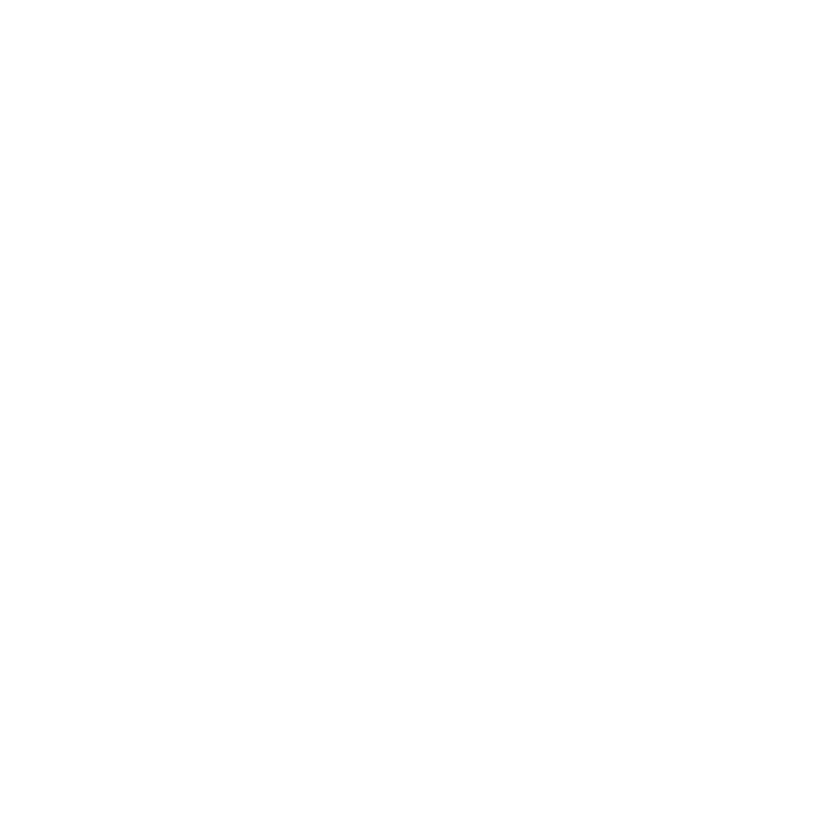

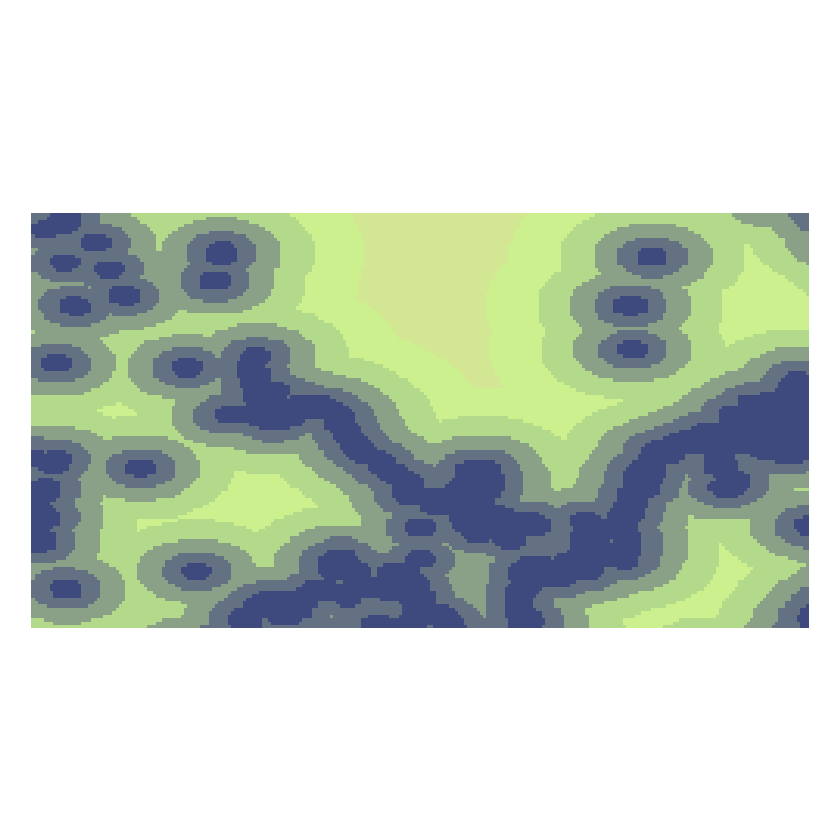

In [8]:
#Original raster
distance_to_water_ras <- as.raster(arc.raster(arc.open("data/data.gdb/World_Distance_to_Water_Stud_SM")))
dim(distance_to_water_ras)
raster::plot(distance_to_water_ras)

[1] 50 50  1

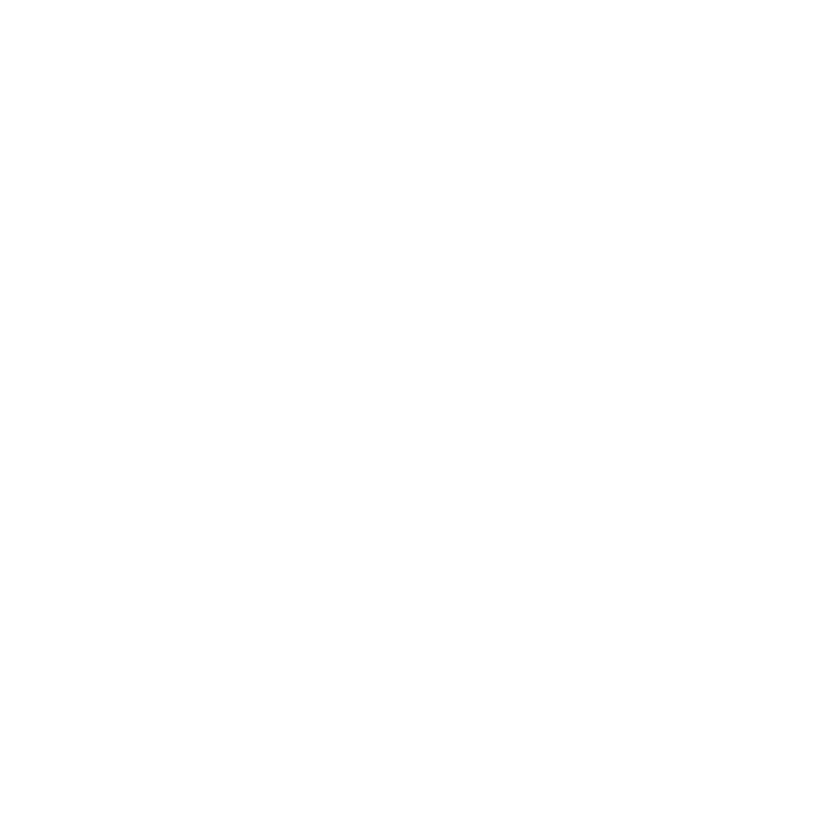

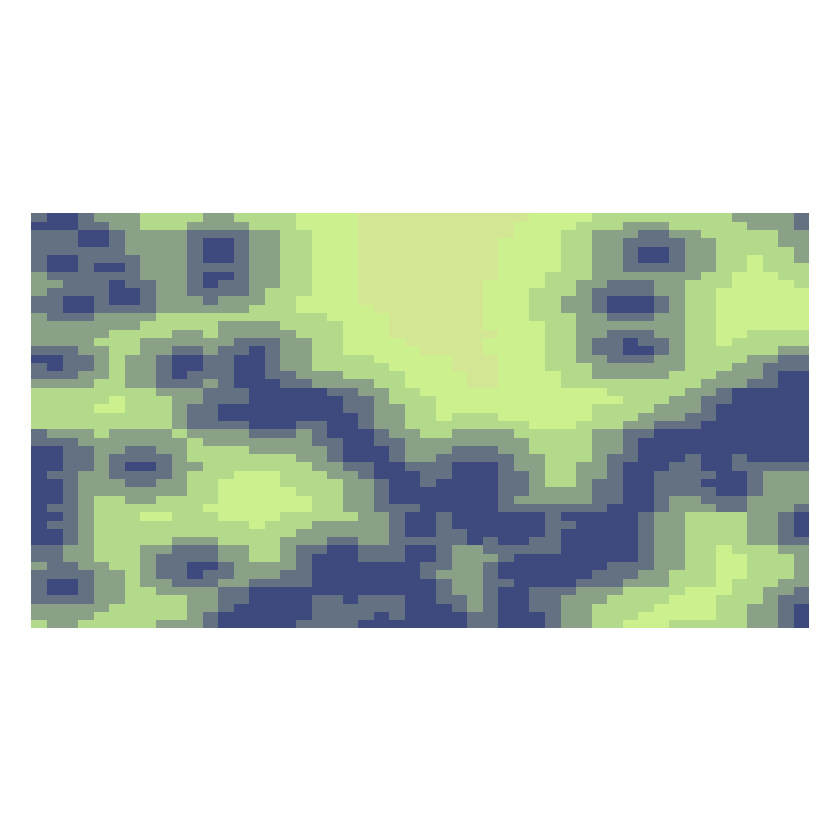

In [7]:
#New raster with adjusted spatial resolution
distance_to_water_ras <- as.raster(arc.raster(arc.open("data/data.gdb/World_Distance_to_Water_Stud_SM"), nrow = 50, ncol = 50))
dim(distance_to_water_ras)
raster::plot(distance_to_water_ras)

##### Extent 

You can adjust the extent for the raster object you bring into R by using the extent parameter and specifying your desired xmax, ymax, xmin, and ymin values in a numeric vector. Order does matter here, so be mindful as you select your values. If you pick a smaller extent, what will be returned will be a subset of your original raster. 

In the example below, we are adjusting the extent of our raster to have a xmax value of 32.5, a ymax value of -24.5, a xmin value of 30.5, and a ymin value of -25.

```R
distance_to_water_ras_extent <- as.raster(arc.raster(arc.open("data/data.gdb/World_Distance_to_Water_Stud_SM"), nrow = 100, ncol = 100, extent = c(32.5, -25, 30.5, -24.5)))

```

We can test out the results in the R console below. 

In [4]:
#Original extent values
distance_to_water_ras <- as.raster(arc.raster(arc.open("data/data.gdb/World_Distance_to_Water_Stud_SM")))
distance_to_water_ras@extent                                

#Modified extent values
distance_to_water_ras_extent <- as.raster(arc.raster(arc.open("data/data.gdb/World_Distance_to_Water_Stud_SM"), extent = c(32.5, -25, 30.5, -24.5)))
distance_to_water_ras_extent@extent

class       : Extent 
xmin        : 30.98066 
xmax        : 32.96726 
ymin        : -25.46767 
ymax        : -24.50616 

class       : Extent 
xmin        : 30.5 
xmax        : 32.5 
ymin        : -25 
ymax        : -24.5 

##### Reprojecting

Similarly to the `arc.select()` function, we can reproject our data by using the `sr` parameter and specifying either the ESPG reference number, the WKT, or proj4 associcated with the ESPG reference number for the desired projection. Our `World_Distance_to_Waster_Stud_SM` file geodatabase raster is currently not projected. If we wished to add a projection, we could do so in the following way:

ESPG reference number

```R
distance_to_water_ras <- arc.raster(arc.open("data/data.gdb/World_Distance_to_Water_Stud_SM"), nrow = 100, ncol = 100, sr = 102003)
```
By checking the value of the `sr` attribute value, we can see our spatial reference has now changed.

In [9]:
#Original Spatial Reference Information
distance_to_water_ras <- arc.raster(arc.open("data/data.gdb/World_Distance_to_Water_Stud_SM"), nrow = 100, ncol = 100)
distance_to_water_ras$sr

#ESPG reference number
distance_to_water_ras <- arc.raster(arc.open("data/data.gdb/World_Distance_to_Water_Stud_SM"), nrow = 100, ncol = 100, sr = 102003)
distance_to_water_ras$sr


$WKT
[1] "GEOGCS[\"WGS 84\",DATUM[\"World Geodetic System 1984\",SPHEROID[\"WGS 84\",6378137.0,298.257223563]],PRIMEM[\"Greenwich\",0.0],UNIT[\"degree\",0.0174532925199433]]"

$WKID
[1] 0

$WKT
[1] "PROJCS[\"USA_Contiguous_Albers_Equal_Area_Conic\",GEOGCS[\"GCS_North_American_1983\",DATUM[\"D_North_American_1983\",SPHEROID[\"GRS_1980\",6378137.0,298.257222101]],PRIMEM[\"Greenwich\",0.0],UNIT[\"Degree\",0.0174532925199433]],PROJECTION[\"Albers\"],PARAMETER[\"False_Easting\",0.0],PARAMETER[\"False_Northing\",0.0],PARAMETER[\"Central_Meridian\",-96.0],PARAMETER[\"Standard_Parallel_1\",29.5],PARAMETER[\"Standard_Parallel_2\",45.5],PARAMETER[\"Latitude_Of_Origin\",37.5],UNIT[\"Meter\",1.0]]"

$WKID
[1] 102003

#### as.raster Functionality

We have already seen the `as.raster()` function in some of the examples above, but to formally define it, the `as.raster()` function is from the R package **raster** and is designed to help create raster objects. It is utilized in the **arcgisbinding** package to help finish the conversion process from an ArcGIS raster type to an R **raster** package object. Full documentation on the function can be found [here](https://www.rdocumentation.org/packages/raster/versions/2.6-7/topics/as.raster). 

## Write: Writing R Data Into ArcGIS

When you are finished working in R, it is likely you will wish to transfer your results back into ArcGIS either for future analysis or to map and share the final results. In which case, the `arc.write()` function is here to help. 

### arc.write Functionality

The `arc.write()` function allows you to easily save your data to shapefile, file geodatabase, table, or supported raster data type of your choice. The first argument is the path for the location of the folder or file geodatabase you wish to write your new results to along with the file extension you want. The second argument specifies the R object you are writing to this new location. Additional optional parameters allow you to provide the geometry type and spatial reference for your data, if desired. 

In the example below, the `crashes_subset_df` object from our section on [Column Selections](#Column-Selections) is being written out to our data folder as a shapefile. This example could also easily be modified to write to a file geodatabase by changing the path to `'data/data.gdb/writing_practice'`, if desired. 

```R
arc.write("data/writing_practice.shp", crashes_subset_df)
```

The `arc.write` function has also been designed with data generation in mind. For example, the function can be used to create new features in ArcGIS as demonstrated below where the `arc.write` function creates 100 uniformly distributed points in a unit square from a normal distribution.

```R
arc.write("data/new_pts.shp", data = list('data'=rnorm(100)),
          coords = list(x=runif(100,min=0,max=1),y=runif(100,min=0,max=1)),
          shape_info = list(type='Point'))

```

After running `arc.write()` we can observe a new shapefile has been added to our data folder by using the `list.files()` function. 

In [29]:
arc.write("data/writing_practice.shp", crashes_subset_df)
list.files(path = "data")

[1] "crashes_per_mile.CPG"                          
 [2] "crashes_per_mile.dbf"                          
 [3] "crashes_per_mile.prj"                          
 [4] "crashes_per_mile.sbn"                          
 [5] "crashes_per_mile.sbx"                          
 [6] "crashes_per_mile.shp"                          
 [7] "crashes_per_mile.shp.MARJEAN.9772.9804.sr.lock"
 [8] "crashes_per_mile.shp.xml"                      
 [9] "crashes_per_mile.shx"                          
[10] "data.gdb"                                      
[11] "new_pts.cpg"                                   
[12] "new_pts.dbf"                                   
[13] "new_pts.shp"                                   
[14] "new_pts.shx"                                   
[15] "writing_practice.cpg"                          
[16] "writing_practice.dbf"                          
[17] "writing_practice.prj"                          
[18] "writing_practice.shp"                          
[19] "writing_practice.shx"

## Delete: Remove and Replace Data

Occassionally, we make mistakes and create something we wish to overwrite. In these cases, you can do this by first removing your unwanted data using `arc.delete()`. 

### arc.delete Functionality

If you have generated output through the `arc.write()` function that you wish to remove, you can use the `arc.delete()` function to either permanently delete the previously created output or to delete the old output prior to recreating it again with 'arc.write'.  

In the example above for `arc.write()`, we created the `writing_practice.shp` in our `data` folder. We can remove this file by using the `arc.delete()` function. 

```R
arc.delete("data/writing_practice.shp")

```

After running `arc.delete()` we can observe our `writing_practice` shapefile has been deleted from our data folder by using the `list.files()` function. 

In [37]:
arc.delete("data/writing_practice.shp")
list.files(path = "data")

[1] "crashes_per_mile.CPG"     "crashes_per_mile.dbf"    
 [3] "crashes_per_mile.prj"     "crashes_per_mile.sbn"    
 [5] "crashes_per_mile.sbx"     "crashes_per_mile.shp"    
 [7] "crashes_per_mile.shp.xml" "crashes_per_mile.shx"    
 [9] "data.gdb"                 "new_pts.cpg"             
[11] "new_pts.dbf"              "new_pts.shp"             
[13] "new_pts.shx"

## Exercise: Analyze Crime Using Statistics and the R-ArcGIS Bridge

To practice your understanding of how to read, convert, and write data using the **arcgisbinding** package, we will be using the learn lesson: [Analyze Crime Using Statistics and the R-ArcGIS Bridge](https://learn.arcgis.com/en/projects/analyze-crime-using-statistics-and-the-r-arcgis-bridge/). This learn lesson will walk you through a real life example of how you can use bridge functionality to simplify incorporating advanced analytics into your organization's workflows. 